In [435]:
import requests
import copy
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'./module/wqy-microhei.ttc') #設定中文字體




In [436]:
team=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
teamCode=['A02','L01','B04','E02']
# teamStatiumScore: [自己][自己]:[總主場勝,總主場和,總主場敗,總客場勝,總客場和,總客場敗] #[自己][對手]:[主場勝,主場和,主場敗,客場勝,客場和,客場敗]
teamStatiumScore={'Lamigo': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]}, 
            '統一7-ELEVEn': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]},
                    '富邦': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]}, 
                '中信兄弟': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]}}
#依月份分類
monthScore={'03月':copy.deepcopy(teamStatiumScore),'04月':copy.deepcopy(teamStatiumScore),'05月':copy.deepcopy(teamStatiumScore),'06月':copy.deepcopy(teamStatiumScore),'07月':copy.deepcopy(teamStatiumScore),'08月':copy.deepcopy(teamStatiumScore),'09月':copy.deepcopy(teamStatiumScore),'10月':copy.deepcopy(teamStatiumScore)}
monthName=['03月','04月','05月','06月','07月','08月','09月','10月']
'''
# 這邊讓使用者輸入要查看哪一隊的index ['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
teamIndex=3
print("你輸入的是：",team[teamIndex])
'''
def createTeamStatiumScore(teamIndex):
    otherTeam=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    del otherTeam[teamIndex]
    res = requests.get("http://www.cpbl.com.tw/web/team_dayscore.php?&gameno=01&team={}&stype=&sbteamno=&syear=2018".format(teamCode[teamIndex]))# 抓資料頁面
    soup = BeautifulSoup(res.text)
    tableAll = soup.select('table')[0]
    for index,item in enumerate(tableAll.select('tr')):
        if index!=0:
            if item.select('td')[6].text==team[teamIndex]: # 如果 目標team 在主場
                if (int)(item.select('td')[7].text) > (int)(item.select('td')[5].text): 
                    # 如果在主場 目標team 勝
                    for tValue in team:
                        if item.select('td')[4].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][0]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][0]+=1;
                elif (int)(item.select('td')[5].text) == (int)(item.select('td')[7].text) : 
                    # 如果在主場 目標team 和
                    for tValue in team:
                        if item.select('td')[4].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][1]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][1]+=1;
                elif (int)(item.select('td')[7].text) < (int)(item.select('td')[5].text):
                    # 如果在主場 目標team 敗
                    for tValue in team:
                        if item.select('td')[4].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][2]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][2]+=1;
                else:
                    print("Error!")
            elif item.select('td')[4].text==team[teamIndex]: # 如果 目標team 在客場
                if (int)(item.select('td')[5].text) > (int)(item.select('td')[7].text):
                    # 如果在客場 目標team 勝
                    for tValue in team:
                        if item.select('td')[6].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][3]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][3]+=1;
                elif (int)(item.select('td')[5].text)==(int)(item.select('td')[7].text) :
                    # 如果在客場 目標team 和
                    for tValue in team:
                        if item.select('td')[6].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][4]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][4]+=1;
                elif (int)(item.select('td')[5].text) < (int)(item.select('td')[7].text):
                    # 如果在客場 目標team 敗
                    for tValue in team:
                        if item.select('td')[6].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][5]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][5]+=1;
                else:
                    print("error")
            else:
                print("ERROR!")
'''
for i in range(4):
    createTeamStatiumScore(i)
print(teamStatiumScore)
'''
# teamStatiumScore裡的element歸0
def scoreZero():
    for i in team:
        for j in team:
            teamStatiumScore[i][j]=[0,0,0,0,0,0]

def createMonthScore(teamIndex,month):
    otherTeam=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    del otherTeam[teamIndex]
    res = requests.get("http://www.cpbl.com.tw/web/team_dayscore.php?&gameno=01&team={}&stype=&sbteamno=&syear=2018".format(teamCode[teamIndex]))# 抓資料頁面
    soup = BeautifulSoup(res.text)
    tableAll = soup.select('table')[0]
    #scoreZero(teamIndex) #把teamStatiumScore每個element歸0
    #把monthScore某隊某月份每個element歸0   
    mm = monthName[month-3]
    #monthScore[mm]=teamStatiumScore #把monthScore某月份某隊伍每個element歸0
    monthScore[mm][team[teamIndex]]={'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]} 
    for index,item in enumerate(tableAll.select('tr')):
        if index!=0:
            dateMonth = ((item.select('td')[2].text.split('-'))[1]) +'月' # 抓出來的日期月份
            if dateMonth == mm:    #比賽月份＝＝對應輸入的月份
                if item.select('td')[6].text==team[teamIndex]: 
                # 如果 目標team 在主場
                    if (int)(item.select('td')[7].text) > (int)(item.select('td')[5].text):
                        # 如果在主場 目標team 勝
                        for tValue in team:
                            if item.select('td')[4].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][0]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][0]+=1;
                    elif (int)(item.select('td')[5].text) == (int)(item.select('td')[7].text) :
                        # 如果在主場 目標team 和
                        for tValue in team:
                            if item.select('td')[4].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][1]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][1]+=1;
                    elif (int)(item.select('td')[7].text) < (int)(item.select('td')[5].text):
                        # 如果在主場 目標team 敗
                        for tValue in team:
                            if item.select('td')[4].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][2]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][2]+=1;
                    else:
                        print("Error!")
                elif item.select('td')[4].text==team[teamIndex]: 
                # 如果 目標team 在客場
                    if (int)(item.select('td')[5].text) > (int)(item.select('td')[7].text):
                        # 如果在客場 目標team 勝
                        for tValue in team:
                            if item.select('td')[6].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][3]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][3]+=1;
                    elif (int)(item.select('td')[5].text)==(int)(item.select('td')[7].text) :
                        # 如果在客場 目標team 和
                        for tValue in team:
                            if item.select('td')[6].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][4]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][4]+=1;
                    elif (int)(item.select('td')[5].text) < (int)(item.select('td')[7].text):
                        # 如果在客場 目標team 敗
                        for tValue in team:
                            if item.select('td')[6].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][5]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][5]+=1;
                    else:
                        print("error")
                else:
                    print("ERROR!")





In [437]:

for i in range(4):
    createTeamStatiumScore(i)

In [438]:
for i in range(4):
    for j in range(3,11):
        print(i,j)
        createMonthScore(i,j)

0 3


KeyboardInterrupt: 

In [439]:
print(teamStatiumScore)

{'Lamigo': {'Lamigo': [43, 0, 17, 30, 0, 30], '統一7-ELEVEn': [14, 0, 6, 10, 0, 10], '富邦': [13, 0, 7, 10, 0, 10], '中信兄弟': [16, 0, 4, 10, 0, 10]}, '統一7-ELEVEn': {'Lamigo': [10, 0, 10, 6, 0, 14], '統一7-ELEVEn': [36, 1, 23, 28, 0, 32], '富邦': [13, 0, 7, 13, 0, 7], '中信兄弟': [13, 1, 6, 9, 0, 11]}, '富邦': {'Lamigo': [10, 0, 10, 7, 0, 13], '統一7-ELEVEn': [7, 0, 13, 7, 0, 13], '富邦': [28, 0, 32, 26, 0, 34], '中信兄弟': [11, 0, 9, 12, 0, 8]}, '中信兄弟': {'Lamigo': [10, 0, 10, 4, 0, 16], '統一7-ELEVEn': [11, 0, 9, 6, 1, 13], '富邦': [8, 0, 12, 9, 0, 11], '中信兄弟': [29, 0, 31, 19, 1, 40]}}


In [441]:
import numpy as np



def drawStadiumPic(usrInputTeam):
    print("你輸入的是：",team[usrInputTeam])
    tColor=['#6DD9EC', '#FF884D', '#6B8CEA', '#FFCD00']
    mainColor=tColor[usrInputTeam]
    teamExcludeInput=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    teamExcludeInput.remove(teamExcludeInput[usrInputTeam])
    tColor.remove(tColor[usrInputTeam])

    barsize=np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
    for index,value in enumerate(teamExcludeInput):
        for j in range(6):
            barsize[j][index] = teamStatiumScore[team[usrInputTeam]][value][j]
    bar_width=1

    AL = plt.bar([0,1,2],barsize[5], bar_width,color=tColor,edgecolor='black',linewidth=3,alpha=0.3) 
    AT = plt.bar([0,1,2],barsize[4], bar_width,color='#A0A0A0',edgecolor='black',linewidth=3,alpha=0.3,bottom=barsize[5], hatch='////') 
    AW = plt.bar([0,1,2],barsize[3], bar_width,color=mainColor,edgecolor='black',linewidth=3,alpha=0.3,bottom=barsize[4]+barsize[5]) 
    HL = plt.bar([0,1,2],barsize[2], bar_width,color=tColor,edgecolor='green',linewidth=3,alpha=0.9,bottom=barsize[3]+barsize[4]+barsize[5]) 
    HT = plt.bar([0,1,2],barsize[1], bar_width,color='#A0A0A0',edgecolor='green',linewidth=3,alpha=1,bottom=barsize[2]+barsize[3]+barsize[4]+barsize[5], hatch='////') 
    HW = plt.bar([0,1,2],barsize[0], bar_width,color=mainColor,edgecolor='green',linewidth=3,alpha=0.9,bottom=barsize[1]+barsize[2]+barsize[3]+barsize[4]+barsize[5])
    plt.xticks(range(3), teamExcludeInput,fontproperties=myfont,size=14)
    plt.title("{}全年主客場與勝負關係".format(team[usrInputTeam]),fontproperties=myfont,size=20)
    marktype=['主場勝','主場和','主場敗','客場勝','客場和','客場敗']
    for xindex, xvalue in enumerate(barsize):
        height=[0,0,0]
        for i in range((xindex+1),6):
            height+=barsize[i]
        for yindex, yvalue in enumerate(xvalue):
            mark = marktype[xindex]+str(yvalue) if yvalue!=0 else ""
            plt.text(yindex-0.3 , yvalue/2+height[yindex]-0.3, mark,fontproperties=myfont,size=16)
    plt.text(-1.1,30,"主\n場",fontproperties=myfont,color='green',size=22)
    plt.text(-1.1,10,"客\n場",fontproperties=myfont,color='gray',size=22)
    #plt.legend() 
    plt.grid(False)
    plt.show()

你輸入的是： Lamigo


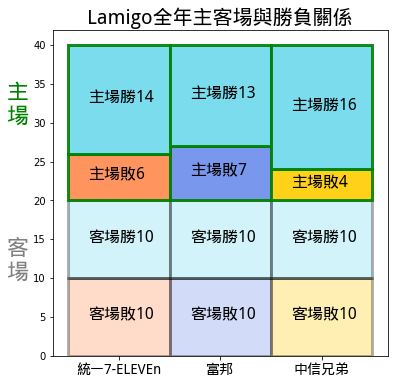

你輸入的是： 統一7-ELEVEn


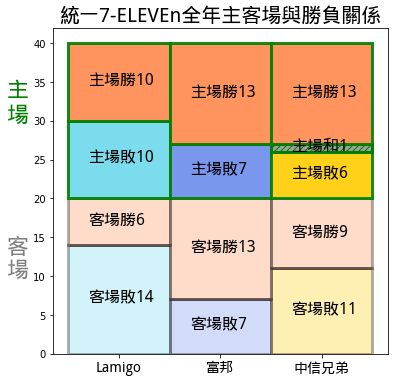

你輸入的是： 富邦


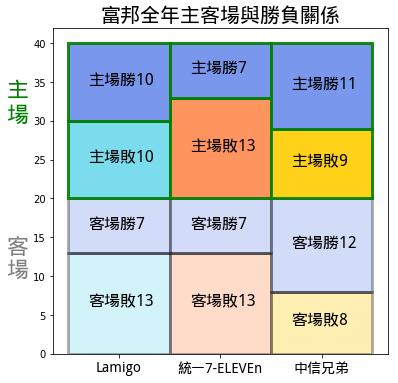

你輸入的是： 中信兄弟


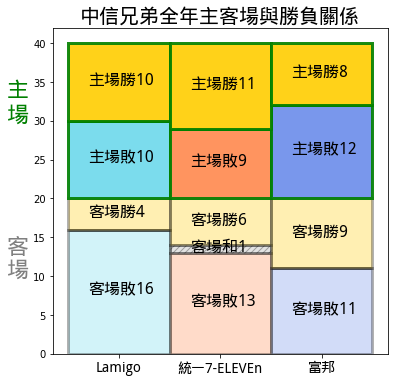

In [446]:
fig = plt.figure(figsize=(6, 6))
#這邊讓使用者輸入要查看哪一隊的index ['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
usrInputTeam=0
drawStadiumPic(usrInputTeam)

fig = plt.figure(figsize=(6, 6))
#這邊讓使用者輸入要查看哪一隊的index ['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
usrInputTeam=1
drawStadiumPic(usrInputTeam)

fig = plt.figure(figsize=(6, 6))
#這邊讓使用者輸入要查看哪一隊的index ['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
usrInputTeam=2
drawStadiumPic(usrInputTeam)

fig = plt.figure(figsize=(6, 6))
#這邊讓使用者輸入要查看哪一隊的index ['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
usrInputTeam=3
drawStadiumPic(usrInputTeam)
